# Load Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [6]:
# 판다스의 read_csv를 활용해 train.csv 파일을 읽어옵니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


# EDA

## Dates

In [7]:
train["Dates"] = pd.to_datetime(train["Dates"])

train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [10]:
X_outliers = (train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())

outlier = train[X_outliers & Y_outliers]
non_outliers = train[~(X_outliers & Y_outliers)]
print(outlier.shape)
outlier.head()

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0


### 이상치 제거한 non_outliers로 진행

#### **```주말 및 평일```** 그룹화

- 토/일 주말로 하여 feature에 넣어보기

In [11]:
non_outliers['DayOfWeek_weekend'] = non_outliers['DayOfWeek'] == 'Saturday|Sunday'

non_outliers[['DayOfWeek','DayOfWeek_weekend']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DayOfWeek,DayOfWeek_weekend
0,Wednesday,False
1,Wednesday,False
2,Wednesday,False
3,Wednesday,False
4,Wednesday,False


#### **```'분'```** 전처리

In [33]:
def summary_minute(minute):
    
#     print(minute)
    
    if (minute > 0) and (minute < 16):
        minute = 15
        return minute
    
    elif (minute > 15) and (minute < 31):
        minute = 30
        return minute
    
    elif (minute > 30) and (minute < 46):
        minute = 45
        return minute
    
    elif (minute > 45):
        minute = 0
        return minute
    
    elif (minute < 1):
        minute = 0
        return minute
    
non_outliers['Dates-minute(clean)'] = non_outliers['Dates-minute'].apply(summary_minute)

non_outliers[['Dates-minute', 'Dates-minute(clean)']].head()

,Dates-minute,Dates-minute(clean)
0,53,0
1,53,0
2,33,45
3,30,30
4,30,30


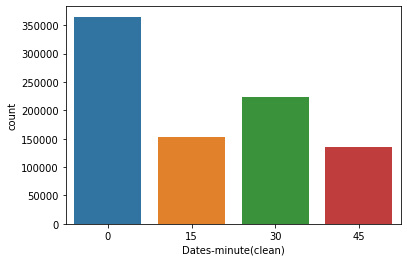

In [34]:
sns.countplot(data=non_outliers, x='Dates-minute(clean)')

In [35]:
test['Dates-minute(clean)'] = test['Dates-minute'].apply(summary_minute)

test[['Dates-minute', 'Dates-minute(clean)']].head()

,Dates-minute,Dates-minute(clean)
Id,,
0,59,0
1,51,0
2,50,0
3,45,45
4,45,45


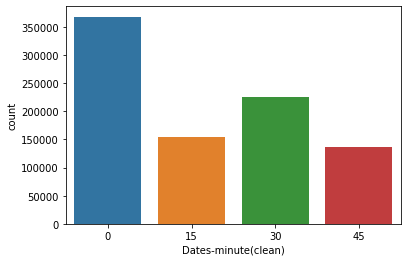

In [36]:
sns.countplot(data=test, x='Dates-minute(clean)')

#### **```'주소'```** 전처리

교차로만 True

In [37]:
non_outliers['Crossroad'] = non_outliers['Address'].str.contains('/')

non_outliers[['Address','Crossroad']].head()

,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


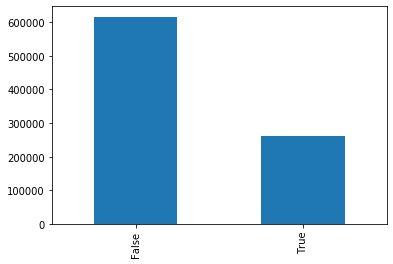

In [38]:
non_outliers['Crossroad'].value_counts().plot.bar()

In [39]:
test['Crossroad'] = test['Address'].str.contains('/')

test[['Address','Crossroad']].head()

,Address,Crossroad
Id,,
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


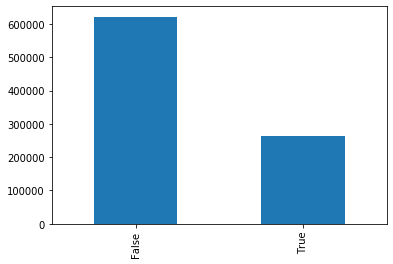

In [40]:
test['Crossroad'].value_counts().plot.bar()

worst block 이랑 worst st top1 분류

In [41]:
non_outliers['WorstOfBlock'] = (non_outliers['Crossroad']=='800 Block of BRYANT ST')

non_outliers['WorstOfST'] = (non_outliers['Crossroad']=='16TH ST / MISSION ST')

non_outliers[['Address','WorstOfBlock','WorstOfST']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Address,WorstOfBlock,WorstOfST
0,OAK ST / LAGUNA ST,False,False
1,OAK ST / LAGUNA ST,False,False
2,VANNESS AV / GREENWICH ST,False,False
3,1500 Block of LOMBARD ST,False,False
4,100 Block of BRODERICK ST,False,False


In [42]:
test['WorstOfBlock'] = test['Crossroad']=='800 Block of BRYANT ST'

test['WorstOfST'] = test['Crossroad']=='16TH ST / MISSION ST'

test[['Address','WorstOfBlock','WorstOfST']].head()

C:\Users\Johns\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Address,WorstOfBlock,WorstOfST
Id,,,
0,2000 Block of THOMAS AV,False,False
1,3RD ST / REVERE AV,False,False
2,2000 Block of GOUGH ST,False,False
3,4700 Block of MISSION ST,False,False
4,4700 Block of MISSION ST,False,False


도로명 WY, AV, ST, DR, BL, MA 분리하기

In [43]:
def findname(data):
    
    if '/' in data:
        return 'Crossroad'
    
    elif 'ST' in data.split(' ')[-1]:
        return 'ST'
    
    elif 'AV' in data.split(' ')[-1]:
        return 'AV'
    
    else:
        return 'Others'
    
non_outliers['division_address'] = non_outliers['Address'].apply(findname)

non_outliers[['Address','division_address']].head()

,Address,division_address
0,OAK ST / LAGUNA ST,Crossroad
1,OAK ST / LAGUNA ST,Crossroad
2,VANNESS AV / GREENWICH ST,Crossroad
3,1500 Block of LOMBARD ST,ST
4,100 Block of BRODERICK ST,ST


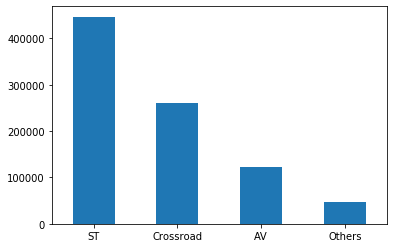

In [44]:
non_outliers['division_address'].value_counts().plot.bar(rot=0)

In [45]:
unnique_road_list = non_outliers['division_address'].unique()
unnique_road_list

array(['Crossroad', 'ST', 'AV', 'Others'], dtype=object)

In [46]:
for i in unnique_road_list:
    non_outliers[i] = non_outliers['division_address'] == i
    
non_outliers[['Address','ST', 'AV','Crossroad','Others']].head()

,Address,ST,AV,Crossroad,Others
0,OAK ST / LAGUNA ST,False,False,True,False
1,OAK ST / LAGUNA ST,False,False,True,False
2,VANNESS AV / GREENWICH ST,False,False,True,False
3,1500 Block of LOMBARD ST,True,False,False,False
4,100 Block of BRODERICK ST,True,False,False,False


In [47]:
def findname(data):
    
    if '/' in data:
        return 'Crossroad'
    
    elif 'ST' in data.split(' ')[-1]:
        return 'ST'
    
    elif 'AV' in data.split(' ')[-1]:
        return 'AV'
    
    else:
        return 'Others'
    
test['division_address'] = test['Address'].apply(findname)

test[['Address','division_address']].head()

,Address,division_address
Id,,
0,2000 Block of THOMAS AV,AV
1,3RD ST / REVERE AV,Crossroad
2,2000 Block of GOUGH ST,ST
3,4700 Block of MISSION ST,ST
4,4700 Block of MISSION ST,ST


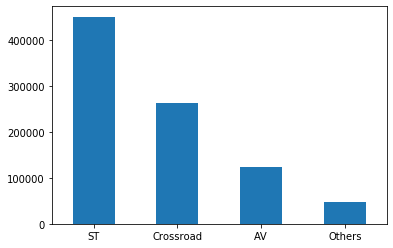

In [48]:
test['division_address'].value_counts().plot.bar(rot=0)

In [49]:
for i in unnique_road_list:
    test[i] = test['division_address'] == i
    
test[['Address','ST', 'AV','Crossroad','Others']].head()

,Address,ST,AV,Crossroad,Others
Id,,,,,
0,2000 Block of THOMAS AV,False,True,False,False
1,3RD ST / REVERE AV,False,False,True,False
2,2000 Block of GOUGH ST,True,False,False,False
3,4700 Block of MISSION ST,True,False,False,False
4,4700 Block of MISSION ST,True,False,False,False


#### **```요일```** 전처리 하기

In [50]:
for day in dayofweek_list:
    non_outliers[f'DayOfWeek_{day}'] = non_outliers['DayOfWeek'].str.contains(day)
        
non_outliers[['DayOfWeek','DayOfWeek_Monday',
        'DayOfWeek_Tuesday','DayOfWeek_Wednesday',
        'DayOfWeek_Thursday','DayOfWeek_Friday',
        'DayOfWeek_Saturday','DayOfWeek_Sunday']]

,DayOfWeek,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
0,Wednesday,False,False,True,False,False,False,False
1,Wednesday,False,False,True,False,False,False,False
2,Wednesday,False,False,True,False,False,False,False
3,Wednesday,False,False,True,False,False,False,False
4,Wednesday,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
878044,Monday,True,False,False,False,False,False,False
878045,Monday,True,False,False,False,False,False,False
878046,Monday,True,False,False,False,False,False,False
878047,Monday,True,False,False,False,False,False,False


In [51]:
for day in dayofweek_list:
    test[f'DayOfWeek_{day}'] = test['DayOfWeek'].str.contains(day)
        
test[['DayOfWeek','DayOfWeek_Monday',
        'DayOfWeek_Tuesday','DayOfWeek_Wednesday',
        'DayOfWeek_Thursday','DayOfWeek_Friday',
        'DayOfWeek_Saturday','DayOfWeek_Sunday']]

,DayOfWeek,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday
Id,,,,,,,,
0,Sunday,False,False,False,False,False,False,True
1,Sunday,False,False,False,False,False,False,True
2,Sunday,False,False,False,False,False,False,True
3,Sunday,False,False,False,False,False,False,True
4,Sunday,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
884257,Wednesday,False,False,True,False,False,False,False
884258,Wednesday,False,False,True,False,False,False,False
884259,Wednesday,False,False,True,False,False,False,False


#### **```면적```** 전처리

지역당 면적계산(구글 맵 이용) 대략적인 면적 수치를 나타내었음.

1. NORTHERN : 6.90km^2(둘레 12.50km)
2. PARK : 7.37 km^2(둘레 13.17km)
3. INGLESIDE : 17.95km^2(둘레 22.14km)
4. BAYVIEW : 19.67km^2(둘레 25.75km)
5. RICHMOND : 8.71km^2(둘레 16.15km)
6. CENTRAL : 5.85km^2(둘레 10.58km)
7. TARAVAL : 20.69km^2(둘레 24.83km)
8. TENDERLOIN : 0.61km^2(둘레 3.51km)
9. MISSION : 7.43km^2(둘레 10.86km)
10. SOUTHERN : 4.38km^2(둘레 9.03km)

In [52]:
size_df = (pd
           .DataFrame(
               {'area':['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL','TARAVAL', 
                        'TENDERLOIN', 'MISSION', 'SOUTHERN'],
                'area(square kilometer)': [6.90, 7.37, 17.95, 19.67, 8.71, 5.85, 20.69, 0.61, 7.43, 4.38],
                'round(kilometer)':[12.50, 13.17, 22.14, 25.75, 16.15, 10.58, 24.83, 3.51, 10.86, 9.03]}
           )
          )

size_df

,area,area(square kilometer),round(kilometer)
0,NORTHERN,6.90,12.50
1,PARK,7.37,13.17
2,INGLESIDE,17.95,22.14
3,BAYVIEW,19.67,25.75
4,RICHMOND,8.71,16.15
5,CENTRAL,5.85,10.58
6,TARAVAL,20.69,24.83
7,TENDERLOIN,0.61,3.51
8,MISSION,7.43,10.86
9,SOUTHERN,4.38,9.03


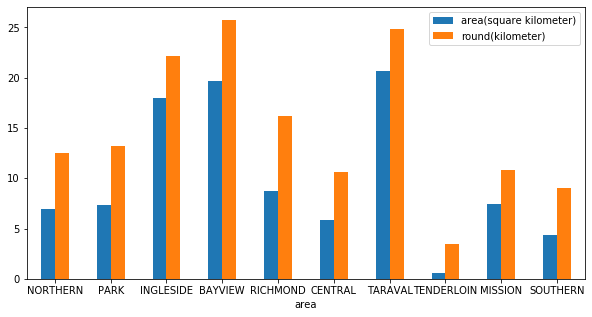

In [53]:
size_df.plot.bar(x='area', figsize=(10,5), rot=0)

In [54]:
crime_count = pd.DataFrame(non_outliers['PdDistrict'].value_counts()).reset_index().rename({'index':'area'}, axis=1)

crime_count

,area,PdDistrict
0,SOUTHERN,157174
1,MISSION,119907
2,NORTHERN,105284
3,BAYVIEW,89422
4,CENTRAL,85455
5,TENDERLOIN,81794
6,INGLESIDE,78841
7,TARAVAL,65592
8,PARK,49311
9,RICHMOND,45202


In [55]:
crime_size_df = size_df.merge(crime_count, on='area', how='left').drop('round(kilometer)', axis=1)

crime_size_df

,area,area(square kilometer),PdDistrict
0,NORTHERN,6.90,105284
1,PARK,7.37,49311
2,INGLESIDE,17.95,78841
3,BAYVIEW,19.67,89422
4,RICHMOND,8.71,45202
5,CENTRAL,5.85,85455
6,TARAVAL,20.69,65592
7,TENDERLOIN,0.61,81794
8,MISSION,7.43,119907
9,SOUTHERN,4.38,157174


In [56]:
crime_size_df['district/area'] = crime_size_df['PdDistrict'] / crime_size_df['area(square kilometer)']

crime_size_df = crime_size_df.sort_values(by='district/area', ascending=False)

crime_size_df

,area,area(square kilometer),PdDistrict,district/area
7,TENDERLOIN,0.61,81794,134088.524590
9,SOUTHERN,4.38,157174,35884.474886
8,MISSION,7.43,119907,16138.223419
0,NORTHERN,6.90,105284,15258.550725
5,CENTRAL,5.85,85455,14607.692308
1,PARK,7.37,49311,6690.773406
4,RICHMOND,8.71,45202,5189.667049
3,BAYVIEW,19.67,89422,4546.110829
2,INGLESIDE,17.95,78841,4392.256267
6,TARAVAL,20.69,65592,3170.227163


In [57]:
area_list = ['TENDERLOIN', 'SOUTHERN', 'MISSION','NORTHERN', 'CENTRAL', 'PARK', 'RICHMOND', 'BAYVIEW','INGLESIDE', 'TARAVAL']

area_list

['TENDERLOIN',
 'SOUTHERN',
 'MISSION',
 'NORTHERN',
 'CENTRAL',
 'PARK',
 'RICHMOND',
 'BAYVIEW',
 'INGLESIDE',
 'TARAVAL']

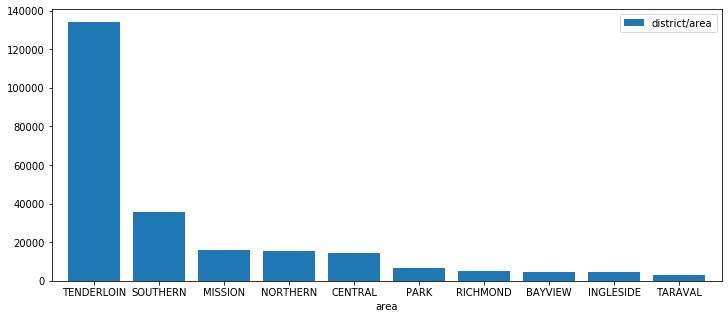

In [58]:
crime_size_df.plot.bar(x='area', y='district/area', figsize=(12,5), rot=0, width=0.8)

단위 면적당 범죄 발생수는 TENDERLOIN이 가장높았습니다. 

고위험군 지역, 중위험군 지역, 저위험군 지역으로 지역을 분류하여 보는 것도 방법일 것 같습니다.\
(* 정확한 위험군 나누기에 대한 판단 근거가 모호해 주관적으로 판단하여 분류함)

고위험군 지역 : tenderloin, southern\
중위험군 : mission, norhern, central\
저위험군 : park, richmond, bayview, ingleside, taraval

In [59]:
crime_size_df.loc[(crime_size_df['area'] == 'TENDERLOIN') | (crime_size_df['area'] == 'SOUTHERN'), 'risk_level'] = 'high'
crime_size_df.loc[(crime_size_df['area'] == 'MISSION') | 
                  (crime_size_df['area'] == 'NORTHERN')| 
                  (crime_size_df['area'] =='CENTRAL'), 'risk_level'] = 'middle'
crime_size_df.loc[(crime_size_df['area'] == 'PARK') |
                  (crime_size_df['area'] == 'RICHMOND') |
                  (crime_size_df['area'] == 'BAYVIEW')|
                  (crime_size_df['area'] == 'INGLESIDE')|
                  (crime_size_df['area'] == 'TARAVAL'), 'risk_level'] = 'low'

crime_size_df

,area,area(square kilometer),PdDistrict,district/area,risk_level
7,TENDERLOIN,0.61,81794,134088.524590,high
9,SOUTHERN,4.38,157174,35884.474886,high
8,MISSION,7.43,119907,16138.223419,middle
0,NORTHERN,6.90,105284,15258.550725,middle
5,CENTRAL,5.85,85455,14607.692308,middle
1,PARK,7.37,49311,6690.773406,low
4,RICHMOND,8.71,45202,5189.667049,low
3,BAYVIEW,19.67,89422,4546.110829,low
2,INGLESIDE,17.95,78841,4392.256267,low
6,TARAVAL,20.69,65592,3170.227163,low


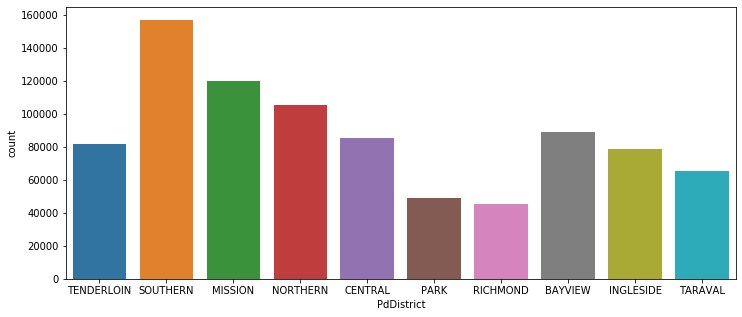

In [60]:
plt.figure(figsize=(12,5))
sns.countplot(data=non_outliers, x='PdDistrict', order=area_list)

In [61]:
district_map = crime_size_df[['area','risk_level']]
district_map

,area,risk_level
7,TENDERLOIN,high
9,SOUTHERN,high
8,MISSION,middle
0,NORTHERN,middle
5,CENTRAL,middle
1,PARK,low
4,RICHMOND,low
3,BAYVIEW,low
2,INGLESIDE,low
6,TARAVAL,low


In [62]:
df = non_outliers.merge(district_map, left_on='PdDistrict', right_on='area', how='left')

print(df.shape)
df.head()

(877982, 33)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Others,DayOfWeek_Monday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday,area,risk_level
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,False,False,False,True,False,False,False,False,NORTHERN,middle
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,False,False,False,True,False,False,False,False,PARK,low


In [63]:
df['risk_level_high'] = df['risk_level'] == 'high'
df['risk_level_middle'] = df['risk_level'] == 'middle'
df['risk_level_low'] = df['risk_level'] == 'low'

print(df.shape)
df.head()

(877982, 36)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,DayOfWeek_Wednesday,DayOfWeek_Thursday,DayOfWeek_Friday,DayOfWeek_Saturday,DayOfWeek_Sunday,area,risk_level,risk_level_high,risk_level_middle,risk_level_low
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,True,False,False,False,False,NORTHERN,middle,False,True,False
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,True,False,False,False,False,PARK,low,False,False,True


In [64]:
test_df = test.merge(district_map, left_on='PdDistrict', right_on='area', how='left')

print(test_df.shape)
test_df.head()

(884262, 41)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,...,DayOfWeek_weekend,Dates-minute(clean),WorstOfBlock,WorstOfST,division_address,ST,AV,Others,area,risk_level
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,...,False,0,False,False,AV,False,True,False,BAYVIEW,low
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,...,False,0,False,False,Crossroad,False,False,False,BAYVIEW,low
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,...,False,0,False,False,ST,True,False,False,NORTHERN,middle
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,False,45,False,False,ST,True,False,False,INGLESIDE,low
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,False,45,False,False,ST,True,False,False,INGLESIDE,low


In [65]:
test_df['risk_level_high'] = test_df['risk_level'] == 'high'
test_df['risk_level_middle'] = test_df['risk_level'] == 'middle'
test_df['risk_level_low'] = test_df['risk_level'] == 'low'

print(test_df.shape)
test_df.head()

(884262, 44)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,...,WorstOfST,division_address,ST,AV,Others,area,risk_level,risk_level_high,risk_level_middle,risk_level_low
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,...,False,AV,False,True,False,BAYVIEW,low,False,False,True
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,...,False,Crossroad,False,False,False,BAYVIEW,low,False,False,True
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,...,False,ST,True,False,False,NORTHERN,middle,False,True,False
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,False,ST,True,False,False,INGLESIDE,low,False,False,True
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,False,ST,True,False,False,INGLESIDE,low,False,False,True


#### **```거리```** 전처리

범죄가 가장 많이 일어나는 지역의 X, Y 평균 위치로부터 떨어진 각 지점의 평균 위치까지의 거리를 계산해보겠습니다.

In [66]:
avg_distirct = non_outliers.pivot_table(index='PdDistrict', values=['X','Y']).reset_index()

avg_distirct['x_differnce'] = avg_distirct['X'] - avg_distirct.loc[avg_distirct['PdDistrict']=='SOUTHERN', 'X'].unique()
avg_distirct['y_differnce'] = avg_distirct['Y'] - avg_distirct.loc[avg_distirct['PdDistrict']=='SOUTHERN', 'Y'].unique()

avg_distirct['distance'] = np.sqrt(avg_distirct['x_differnce']**2 + avg_distirct['y_differnce']**2)

avg_distirct = avg_distirct.sort_values(by='distance').reset_index(drop=True)

avg_distirct

,PdDistrict,X,Y,x_differnce,y_differnce,distance
0,SOUTHERN,-122.405282,37.779915,0.000000,0.000000,0.000000
1,TENDERLOIN,-122.412503,37.783802,-0.007221,0.003888,0.008201
2,CENTRAL,-122.409619,37.795685,-0.004337,0.015770,0.016356
3,NORTHERN,-122.426647,37.786379,-0.021365,0.006464,0.022322
4,MISSION,-122.419409,37.759961,-0.014127,-0.019954,0.024449
5,PARK,-122.445448,37.770299,-0.040166,-0.009615,0.041301
6,BAYVIEW,-122.393550,37.737256,0.011732,-0.042659,0.044243
7,INGLESIDE,-122.428831,37.726543,-0.023549,-0.053372,0.058336
8,RICHMOND,-122.470087,37.780208,-0.064805,0.000293,0.064806
9,TARAVAL,-122.477335,37.737549,-0.072053,-0.042366,0.083585


In [67]:
total_district = (avg_distirct
                  .merge(crime_size_df, left_on='PdDistrict', right_on='area', how='left')
                  .drop('PdDistrict_x', axis=1)
                 .rename({'PdDistrict_y':'crime_count', 'X':'AvgX', 'Y':'AvgY'}, axis=1))

total_district = total_district[['area', 'AvgX','AvgY','x_differnce','y_differnce','distance','area(square kilometer)','crime_count','district/area',
                          'risk_level']]

total_district

,area,AvgX,AvgY,x_differnce,y_differnce,distance,area(square kilometer),crime_count,district/area,risk_level
0,SOUTHERN,-122.405282,37.779915,0.000000,0.000000,0.000000,4.38,157174,35884.474886,high
1,TENDERLOIN,-122.412503,37.783802,-0.007221,0.003888,0.008201,0.61,81794,134088.524590,high
2,CENTRAL,-122.409619,37.795685,-0.004337,0.015770,0.016356,5.85,85455,14607.692308,middle
3,NORTHERN,-122.426647,37.786379,-0.021365,0.006464,0.022322,6.90,105284,15258.550725,middle
4,MISSION,-122.419409,37.759961,-0.014127,-0.019954,0.024449,7.43,119907,16138.223419,middle
5,PARK,-122.445448,37.770299,-0.040166,-0.009615,0.041301,7.37,49311,6690.773406,low
6,BAYVIEW,-122.393550,37.737256,0.011732,-0.042659,0.044243,19.67,89422,4546.110829,low
7,INGLESIDE,-122.428831,37.726543,-0.023549,-0.053372,0.058336,17.95,78841,4392.256267,low
8,RICHMOND,-122.470087,37.780208,-0.064805,0.000293,0.064806,8.71,45202,5189.667049,low
9,TARAVAL,-122.477335,37.737549,-0.072053,-0.042366,0.083585,20.69,65592,3170.227163,low


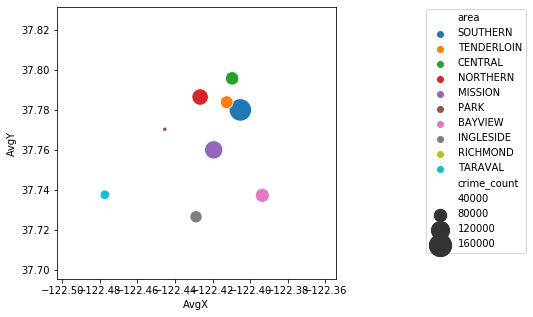

In [59]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=total_district, x='AvgX', y='AvgY', hue='area', size='crime_count', sizes=(0,500) )
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1.01))

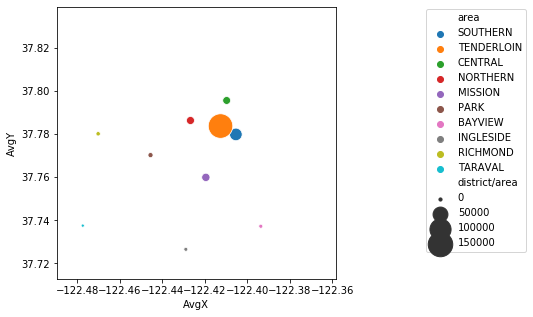

In [77]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=total_district, x='AvgX', y='AvgY', hue='area', size='district/area', sizes=(10,600) )
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1.01))

범죄가 가장 많이 일어난 southern을 기준으로 각 구격의 평균치에 해당하는 곳까지의 거리를 구하여 시각화 해보았습니다.

- southern 에 근접한 tenderloin이나, central의 범죄 발생수는 많지 않지만 면적대비 범죄 발생수가 5위에 달합니다.
- 거리가 멀수록 범죄발생수가 좀 적어지는 것을 볼 수 있는데 상관관계를 통해 상관계수를 확인해보겠습니다.

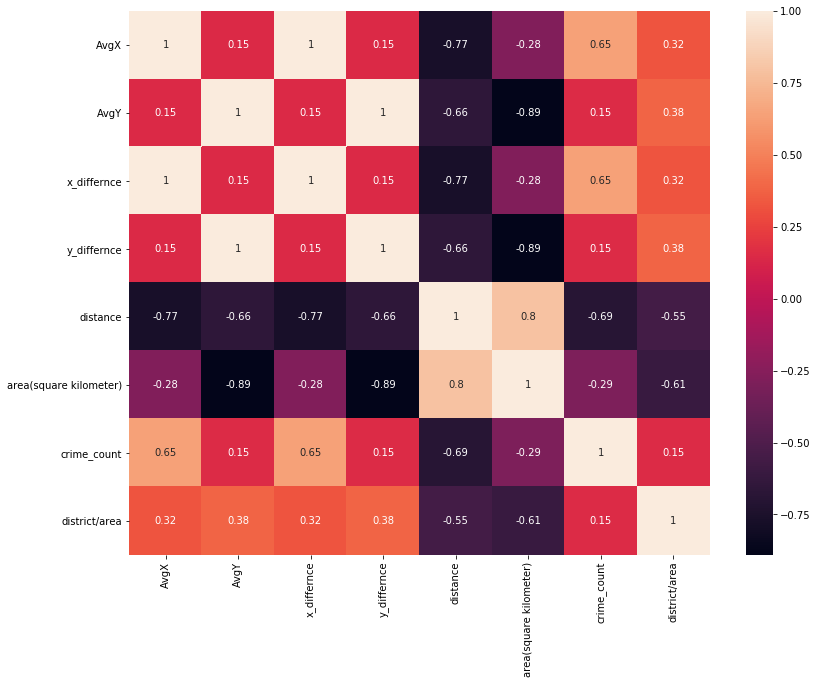

In [60]:
plt.figure(figsize=(13,10))
sns.heatmap(total_district.corr(), annot=True, )

범죄 발생 수와 거리는 -0.69로 강한 수준은 아니지만 약 -0.7 수준으로 음의 상관관계를 가진다고 볼 수 있습니다.